<a href="https://colab.research.google.com/github/gsarm78/cs230Project/blob/master/nowcastingmodeltest%20(gs_v1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gsarm78/cs230Project.git

Cloning into 'cs230Project'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 129 (delta 22), reused 110 (delta 10), pack-reused 0
Receiving objects: 100% (129/129), 8.39 MiB | 19.80 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [4]:
import numpy as np
from PIL import Image
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  ### NO WARNINGS!
import time

IMAGE_PATH = '/content/cs230Project/samples'


WIDTH = 100
HEIGHT = 100
SEQUENCE = np.array([])
BASIC_SEQUENCE = np.array([])
NEXT_SEQUENCE = np.array([])
NUMBER = 0

def image_initialize(image):
    picture = Image.open(image)
    picture = picture.crop((243, 176, 1428, 1280))
    picture = picture.resize((WIDTH, HEIGHT), Image.ANTIALIAS)
    picture = picture.convert('L')
    data = np.array(picture.getdata()).reshape(WIDTH, HEIGHT, 1)
    return data

for file in os.listdir(IMAGE_PATH):
    # print(os.path.join(IMAGE_PATH, directories))
    # print(os.path.join(os.path.join(IMAGE_PATH, directories), file))
    image_array = image_initialize(os.path.join(IMAGE_PATH, file))
    SEQUENCE = np.append(SEQUENCE, image_array)
    NUMBER += 1
    #print(NUMBER)  ## FOR DEBUGGING
    #print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))   ## FOR DEBUGGING

SEQUENCE = SEQUENCE.reshape(NUMBER, WIDTH * HEIGHT)
for i in SEQUENCE:
    for j in range(int(len(i))):
        if i[j] < 50:
            i[j] = 0


np.savez('images_sequence_array.npz', sequence_array=SEQUENCE)
print('Data (images) saved as numpy compressed array')
print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))

Data (images) saved as numpy compressed array
2020-02-21 18:02:30


In [6]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [0]:
#!pip install tensorflow==1.14.0

In [0]:
import numpy as np
from PIL import Image
import os
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
import time

FRAMES = 16 #frames to process

SEQUENCE = np.load('images_sequence_array.npz')['sequence_array']  # load array
print(SEQUENCE[0])
print('Image Sequence Data loaded.')
print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))

NUMBER = len(SEQUENCE)

# step =1
SEQUENCE = SEQUENCE.reshape(NUMBER, WIDTH, HEIGHT, 1)
# step =2
SEQUENCE_2 = []
for i in range(int(NUMBER / 2)):
    SEQUENCE_2.append(SEQUENCE[2 * i])

# step = 3
SEQUENCE_3 = []
for i in range(int(NUMBER / 3)):
    SEQUENCE_3.append(SEQUENCE[3 * i])


SEQUENCE = SEQUENCE.reshape(NUMBER, WIDTH, HEIGHT, 1)
BASIC_SEQUENCE = np.zeros((NUMBER-FRAMES, FRAMES, WIDTH, HEIGHT, 1))
NEXT_SEQUENCE = np.zeros((NUMBER-FRAMES, FRAMES, WIDTH, HEIGHT, 1))


for i in range(FRAMES):
    print(i)
    BASIC_SEQUENCE[:, i, :, :, :] = SEQUENCE[i:i+NUMBER-FRAMES]
    NEXT_SEQUENCE[:, i, :, :, :] = SEQUENCE[i+1:i+NUMBER-FRAMES+1]

model = Sequential()

model.add(ConvLSTM2D(filters=48, kernel_size=(3, 3),input_shape=(None, WIDTH, HEIGHT, 1), padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=48, kernel_size=(3, 3), padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=48, kernel_size=(3, 3), padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=48, kernel_size=(3, 3), padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=48, kernel_size=(3, 3), padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(Conv3D(filters=1, kernel_size=(3, 3, 3), activation='linear', padding='same', data_format='channels_last'))

model.compile(loss='logcosh', optimizer='adam', metrics=['accuracy'])

model.fit(BASIC_SEQUENCE[:20], NEXT_SEQUENCE[:20], batch_size=5, epochs=20, validation_split=0.02)

model.save('trained_model.h5')

[0. 0. 0. ... 0. 0. 0.]
Image Sequence Data loaded.
2020-02-21 18:03:09
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 19 samples, validate on 1 samples
Epoch 1/20





19/19 [==============================] - 23s 1s/step - loss: 8.8051 - acc: 0.3693 - val_loss: 9.6259 - val_acc: 0.6057
Epoch 2/20
19/19 [==============================] - 5s 253ms/step - loss: 8.3513 - acc: 0.5891 - val_loss: 9.4471 - val_acc: 0.7041
Epoch 3/20
19/19 [==============================] - 5s 252ms/step - loss: 8.2459 - acc: 0.8211 - val_loss: 9.4311 - val_acc: 0.7076
Epoch 4/20
19/19 [==============================] - 5s 252ms/step - loss: 8.2250 - acc: 0.8189 - val_loss: 9.3941 - val_acc: 0.7637
Epoch 5/20
19/19 [==============================] - 5s 253ms/step - loss: 8.2118 - acc: 0.8621 - val_loss: 9.3831 - val_acc: 0.8188
Epoch 6/20
19/19 [==============================] - 5s 253ms/step - loss: 8.2022 

In [46]:
# Model Summary; Training parameters etc...
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_47 (ConvLSTM2D) (None, None, 100, 100, 48 84864     
_________________________________________________________________
batch_normalization_47 (Batc (None, None, 100, 100, 48 192       
_________________________________________________________________
conv_lst_m2d_48 (ConvLSTM2D) (None, None, 100, 100, 24 62304     
_________________________________________________________________
batch_normalization_48 (Batc (None, None, 100, 100, 24 96        
_________________________________________________________________
conv_lst_m2d_49 (ConvLSTM2D) (None, None, 100, 100, 12 15600     
_________________________________________________________________
batch_normalization_49 (Batc (None, None, 100, 100, 12 48        
_________________________________________________________________
conv_lst_m2d_50 (ConvLSTM2D) (None, None, 100, 100, 6)

In [0]:
#which = 600
which = 10
track = BASIC_SEQUENCE[which][:10, ::, ::, ::]

In [48]:
for j in range(FRAMES+1):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)

ValueError: ignored

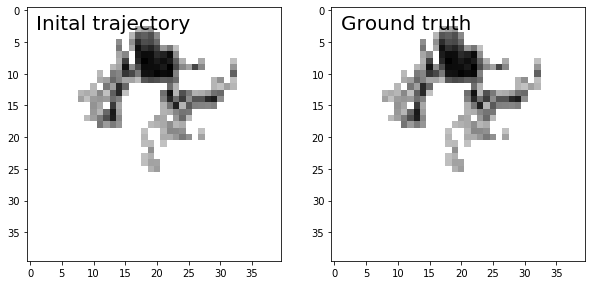

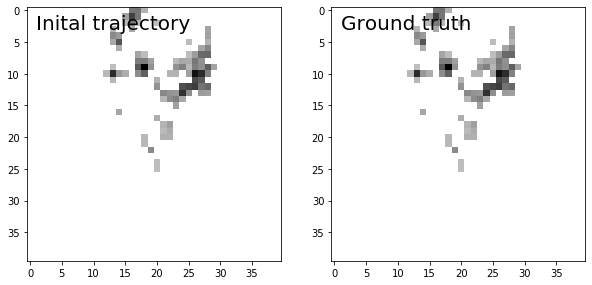

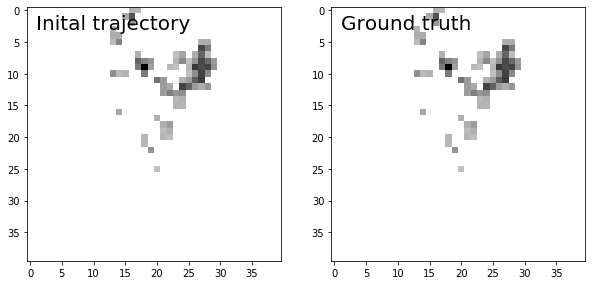

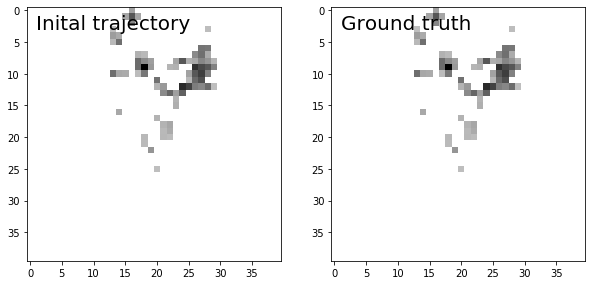

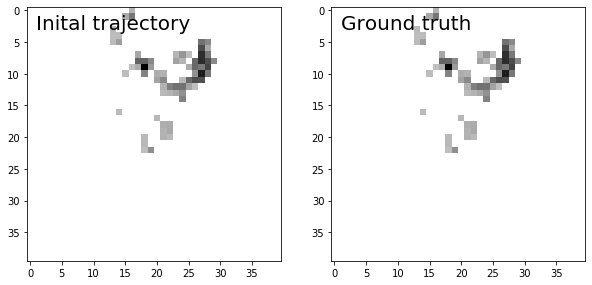

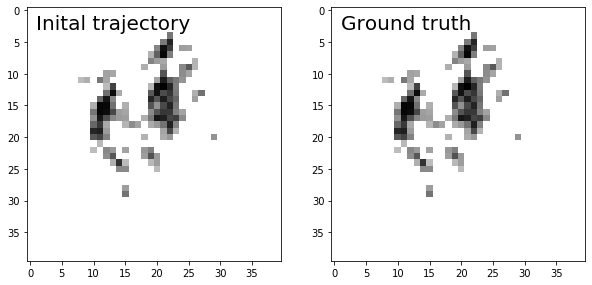

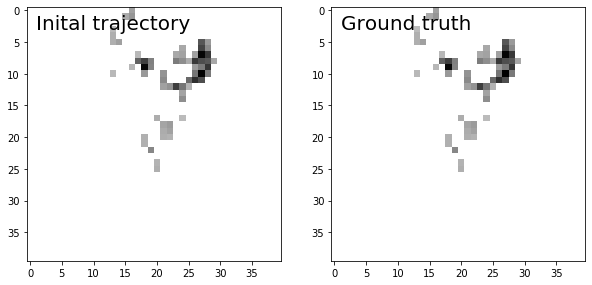

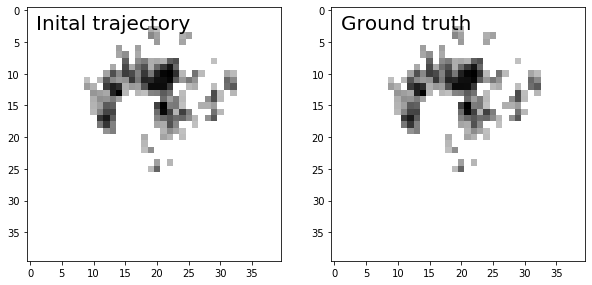

In [28]:
# And then compare the predictions
# to the ground truth
track2 = BASIC_SEQUENCE[which][::, ::, ::, ::]
for i in range(FRAMES):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    if i >= 8:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Inital trajectory', fontsize=20)
    toplot = track[i, ::, ::, 0]
    plt.imshow(toplot, cmap='binary')
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)
    toplot = track2[i, ::, ::, 0]
    if i >= 8:
        toplot = NEXT_SEQUENCE[which][i - 1, ::, ::, 0]
    plt.imshow(toplot, cmap='binary')
    plt.savefig('%i_animate.png' % (i + 1))